In [1]:
import textwrap

import pandas as pd
import prettytable
from venn import venn

from src.config import config

In [2]:
# preview

df = pd.read_csv(config['DATA_DIR'] + '/src/train.csv').set_index('id')
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0


In [3]:
# sample comments of each type

num_comments = 2
max_len = 65

t = prettytable.PrettyTable(['id', 'comment_type', 'comment_text', 'length'])
t.align = 'l'
t.hrules = prettytable.ALL

classes = list(df.columns[2:])
df_neutral = df

for c in classes:
    df_current = df.loc[df[c] == 1]
    df_neutral = df_neutral.loc[df_neutral[c] == 0]
    for _ in range(num_comments):
        id = df_current.sample().index.to_list()[0]
        comment_text = df_current.sample().values[0][0]
        t.add_row(
            [id, c,
             textwrap.shorten(comment_text, max_len),
             len(comment_text)])

# neutral comments
for _ in range(num_comments):
    id = df_current.sample().index.to_list()[0]
    comment_text = df_neutral.sample().values[0][0]
    t.add_row([
        id, '<neutral>',
        textwrap.shorten(comment_text, max_len),
        len(comment_text)
    ])

print(t)

+------------------+---------------+-------------------------------------------------------------------+--------+
| id               | comment_type  | comment_text                                                      | length |
+------------------+---------------+-------------------------------------------------------------------+--------+
| b2859850ff51de3f | severe_toxic  | YOU FAT SLIMY PIECE OF SHIT I HOPE YOU FALL THROUGH THE [...]     | 196    |
+------------------+---------------+-------------------------------------------------------------------+--------+
| 707bc53111846f5c | severe_toxic  | Dumb Liberals Liberals suck. I will beat you at tanks [...]       | 104    |
+------------------+---------------+-------------------------------------------------------------------+--------+
| 7ac737b38283ce7c | obscene       | Fuck off, nigger You'd look real good hanging from a tree         | 59     |
+------------------+---------------+----------------------------------------------------

In [4]:
# stats on class balance
labels = list(df.columns)[1:]

t = prettytable.PrettyTable(['class', 'count'])
t.align = 'l'

s = 0

for label in labels:
    n = len(df.loc[df[labels[0]] == 1])
    s += n
    t.add_row([label, n])

t.add_row(['<neutral>', len(df_neutral)])

print(t)

+---------------+--------+
| class         | count  |
+---------------+--------+
| toxic         | 15294  |
| severe_toxic  | 15294  |
| obscene       | 15294  |
| threat        | 15294  |
| insult        | 15294  |
| identity_hate | 15294  |
| <neutral>     | 149012 |
+---------------+--------+


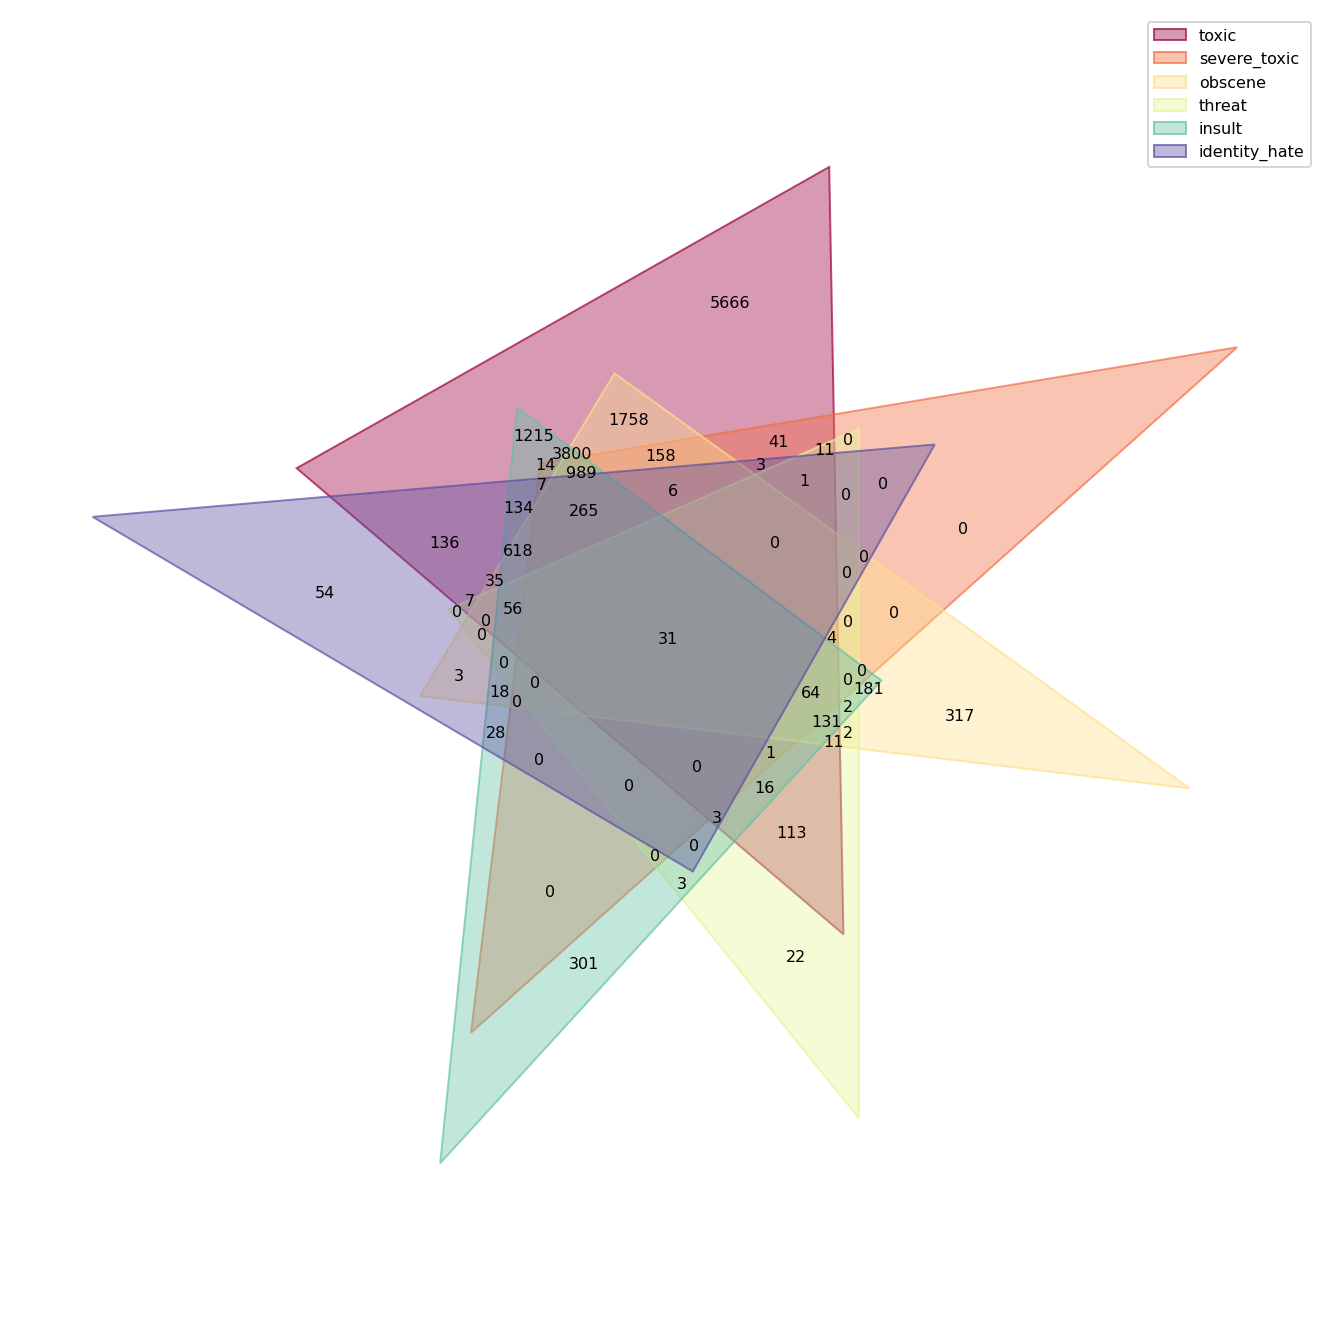

In [5]:
# venn diagram for comment type intersections

classes = list(df.columns[1:])
venn_dict = {}

for c in classes:
    venn_dict[c] = set(df.loc[df[c] == 1].index.to_numpy())

venn(venn_dict, cmap="Spectral", fontsize=8, figsize=(12, 12));

In [6]:
# histograms of text lengths

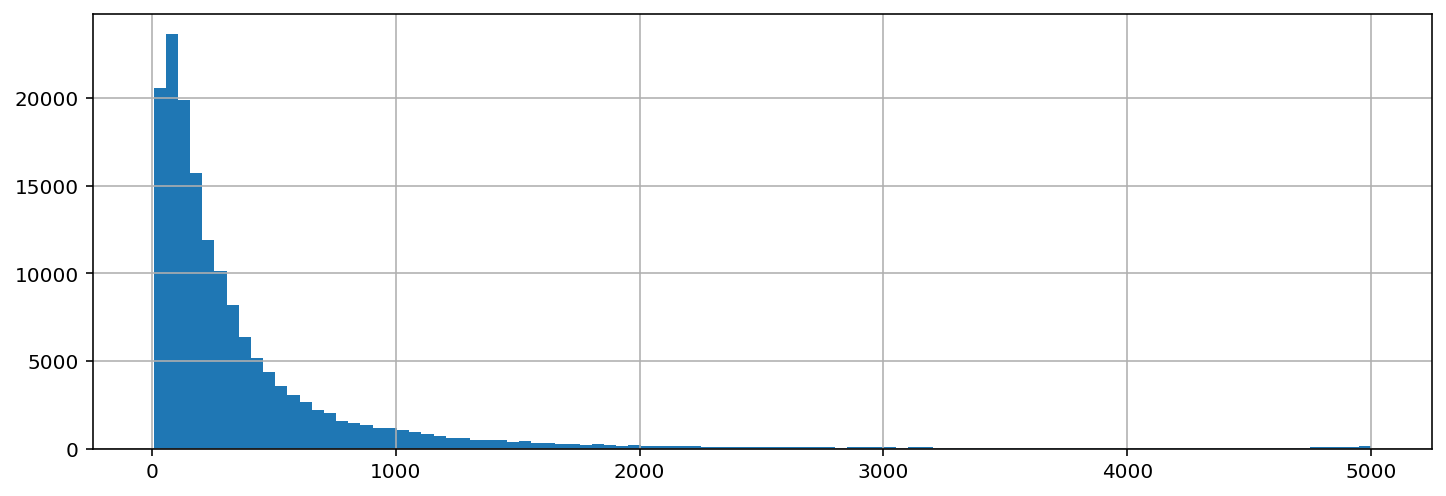

In [7]:
df.comment_text.str.len().hist(bins=100, figsize=(12, 4));

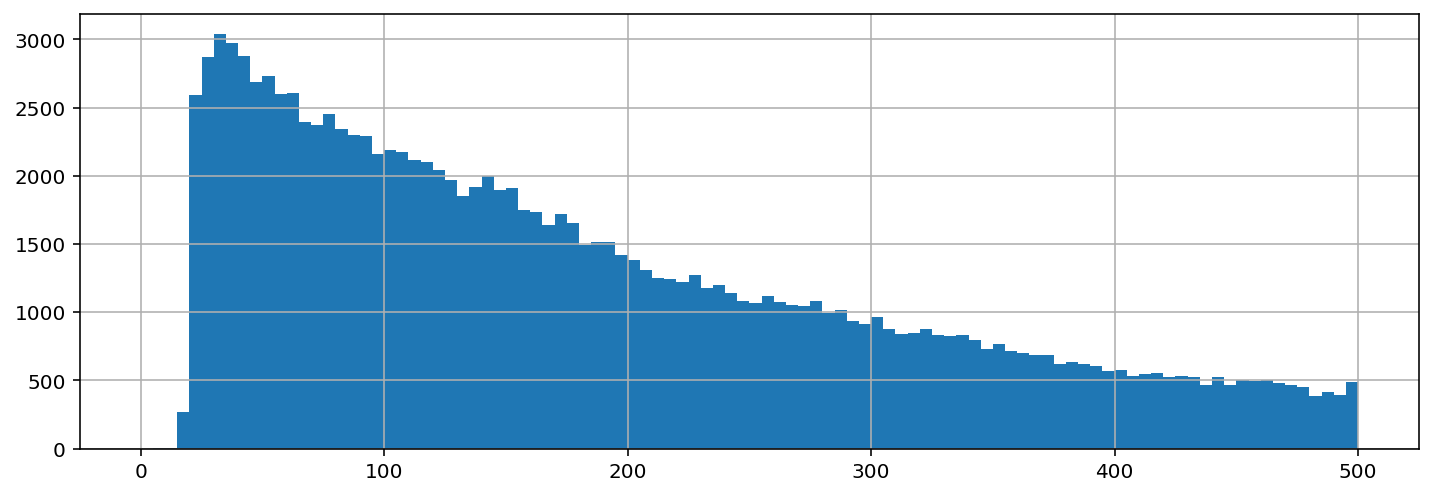

In [8]:
df.comment_text.str.len().hist(bins=100, figsize=(12, 4), range=(0, 500));

In [9]:
# quick filter
df.loc[(df.toxic == 0) & (df.severe_toxic == 0) & (df.obscene == 0) &
       (df.threat == 0) & (df.insult == 0) & (df.identity_hate == 0)]

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
